In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Evanston_Arrests.csv')

In [4]:
print(data.head(5))

   Arrest Key  Relates Incident Number Day of the Week  \
0       37058                 18008504             Mon   
1       48341                 18000033             Tue   
2       48343                 18000040             Wed   
3       48345                 18000055             Wed   
4       48348                 18000104             Fri   

              Arrest Date  Arrest Time  Age     Sex   Race     Ethnicity  \
0  08/28/2017 12:00:00 AM          825   50  Female  Black  Not Hispanic   
1  01/02/2018 12:00:00 AM         1900   17    Male  White           NaN   
2  01/03/2018 12:00:00 AM         1214   42    Male  Black           NaN   
3  01/03/2018 12:00:00 AM         1844   31  Female  Black           NaN   
4  01/05/2018 12:00:00 AM         1008   19    Male  White  Not Hispanic   

          Arrest Type                 Weapon Code  Street Number Street Name  \
0  Taken into Custody                        None         1900.0   DARROW AV   
1  Taken into Custody             

In [5]:

df = pd.DataFrame(data,columns = ['Arrest Key','Relates Incident Number','Day of the Week','Arrest Date','Arrest Time','Age','Sex','Race','Ethnicity',
                                  'Arrest Type','Weapon Code','Street Number','Street Name','City','Location'])

In [6]:
print(df[:5])

   Arrest Key  Relates Incident Number Day of the Week  \
0       37058                 18008504             Mon   
1       48341                 18000033             Tue   
2       48343                 18000040             Wed   
3       48345                 18000055             Wed   
4       48348                 18000104             Fri   

              Arrest Date  Arrest Time  Age     Sex   Race     Ethnicity  \
0  08/28/2017 12:00:00 AM          825   50  Female  Black  Not Hispanic   
1  01/02/2018 12:00:00 AM         1900   17    Male  White           NaN   
2  01/03/2018 12:00:00 AM         1214   42    Male  Black           NaN   
3  01/03/2018 12:00:00 AM         1844   31  Female  Black           NaN   
4  01/05/2018 12:00:00 AM         1008   19    Male  White  Not Hispanic   

          Arrest Type                 Weapon Code  Street Number Street Name  \
0  Taken into Custody                        None         1900.0   DARROW AV   
1  Taken into Custody             

In [7]:
City = df['City']

In [8]:
print(len(City))

623


In [9]:
index_not_Evan = [i for i in range(len(City)) if City[i] != 'EVANSTON'] 

In [10]:
print(index_not_Evan)

[11, 14, 28, 32, 40, 49, 54, 64, 79, 80, 82, 88, 102, 103, 104, 111, 120, 139, 159, 161, 170, 178, 189, 216, 219, 220, 228, 234, 246, 252, 257, 261, 265, 266, 281, 283, 287, 297, 298, 299, 313, 344, 349, 354, 358, 369, 373, 388, 389, 392, 394, 418, 430, 431, 433, 447, 461, 483, 489, 490, 499, 505, 506, 508, 509, 510, 520, 536, 543, 545, 551, 561, 564, 589, 590, 592, 605, 613, 622]


In [11]:
df = df.drop(index_not_Evan)

In [12]:
print(len(df))

544


In [13]:
Location = df['Location']

In [14]:
a = Location.isnull()
print(a)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
12     False
13     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
29     False
30     False
31     False
33     False
       ...  
587    False
588    False
591    False
593    False
594    False
595    False
596    False
597    False
598    False
599    False
600    False
601    False
602    False
603    False
604    False
606    False
607    False
608    False
609    False
610    False
611    False
612    False
614    False
615    False
616    False
617    False
618    False
619    False
620    False
621    False
Name: Location, Length: 544, dtype: bool


In [64]:
week = df['Day of the Week']

In [65]:
week_uni = week.unique()
print(week.unique())


['Mon' 'Tue' 'Wed' 'Fri' 'Sun' 'Thu' 'Sat']


In [127]:
### the week 
### it is not the weekends but the weekdays 
a = pd.value_counts(week)
print(a)

Mon    97
Fri    96
Wed    81
Thu    79
Tue    73
Sat    63
Sun    55
Name: Day of the Week, dtype: int64


In [74]:
import matplotlib.pyplot as plt

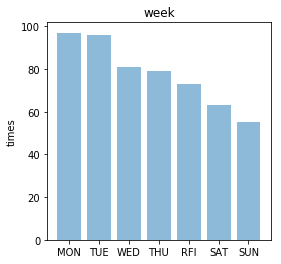

In [82]:
c = ['MON','TUE','WED','THU','RFI','SAT','SUN']
y_pos = np.arange(len(week_uni))
fig = plt.figure(figsize=(4,4))
plt.bar(y_pos,a,align='center', alpha=0.5)
plt.xticks(y_pos, c)
plt.ylabel('times')
plt.title('week')
plt.savefig('week.png')
plt.show()

In [81]:
plt.savefig('week.png')

In [20]:
Time = df['Arrest Time']

In [21]:
print(len(Time))

544


In [22]:
#df['Arrest Time']= map(lambda x: x.zfill(4),df['Arrest Time'])
df['Arrest Time']=df['Arrest Time'].apply(lambda x: '{0:0>4}'.format(x))

In [23]:
print(df['Arrest Time'])

0      0825
1      1900
2      1214
3      1844
4      1008
5      0438
6      0422
7      2200
8      1946
9      1638
10     2057
12     2022
13     0100
15     2008
16     1610
17     1038
18     1325
19     0045
20     0834
21     1029
22     1619
23     0116
24     0530
25     0006
26     0116
27     0800
29     2340
30     1438
31     1349
33     0222
       ... 
587    1615
588    1000
591    1300
593    1620
594    1933
595    2028
596    2100
597    0102
598    2149
599    0207
600    1245
601    1620
602    1518
603    1539
604    1550
606    1057
607    1443
608    2112
609    0134
610    0134
611    0134
612    1740
614    1410
615    1919
616    1557
617    1557
618    1149
619    1117
620    1600
621    0920
Name: Arrest Time, Length: 544, dtype: object


In [24]:
# get the clock of the day 
df['time'] = df['Arrest Time']

In [25]:
print(df.head(5))

   Arrest Key  Relates Incident Number Day of the Week  \
0       37058                 18008504             Mon   
1       48341                 18000033             Tue   
2       48343                 18000040             Wed   
3       48345                 18000055             Wed   
4       48348                 18000104             Fri   

              Arrest Date Arrest Time  Age     Sex   Race     Ethnicity  \
0  08/28/2017 12:00:00 AM        0825   50  Female  Black  Not Hispanic   
1  01/02/2018 12:00:00 AM        1900   17    Male  White           NaN   
2  01/03/2018 12:00:00 AM        1214   42    Male  Black           NaN   
3  01/03/2018 12:00:00 AM        1844   31  Female  Black           NaN   
4  01/05/2018 12:00:00 AM        1008   19    Male  White  Not Hispanic   

          Arrest Type                 Weapon Code  Street Number Street Name  \
0  Taken into Custody                        None         1900.0   DARROW AV   
1  Taken into Custody                   

In [26]:
def get_time(x):
    x = str(x)
    x = x[:2]
    x = int(x)
    return x
    

In [27]:
df['time'] = df['time'].apply(get_time)

In [28]:
print(df[:5])

   Arrest Key  Relates Incident Number Day of the Week  \
0       37058                 18008504             Mon   
1       48341                 18000033             Tue   
2       48343                 18000040             Wed   
3       48345                 18000055             Wed   
4       48348                 18000104             Fri   

              Arrest Date Arrest Time  Age     Sex   Race     Ethnicity  \
0  08/28/2017 12:00:00 AM        0825   50  Female  Black  Not Hispanic   
1  01/02/2018 12:00:00 AM        1900   17    Male  White           NaN   
2  01/03/2018 12:00:00 AM        1214   42    Male  Black           NaN   
3  01/03/2018 12:00:00 AM        1844   31  Female  Black           NaN   
4  01/05/2018 12:00:00 AM        1008   19    Male  White  Not Hispanic   

          Arrest Type                 Weapon Code  Street Number Street Name  \
0  Taken into Custody                        None         1900.0   DARROW AV   
1  Taken into Custody                   

In [29]:
total_time = np.zeros(8)
def compare_n(x):
    for i in range(8):
        if i*3 <= x < (i+1)*3:
            total_time[i]+=1
    return total_time
            
            

In [30]:
to_time = df['time'].apply(compare_n)

In [31]:
print(to_time)

0      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
1      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
2      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
3      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
4      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
5      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
6      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
7      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
8      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
9      [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
10     [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
12     [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
13     [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
15     [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
16     [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
17     [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
18     [73.0, 33.0, 32.0, 64.0, 63.0, 110.0, 92.0, 77.0]
19     [73.0, 33.0, 32.0, 64.0,

In [32]:
print(to_time[0])

[ 73.  33.  32.  64.  63. 110.  92.  77.]


In [126]:
73+33+32+64+63+110+92+77

544

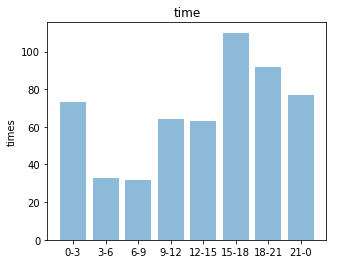

In [83]:
b = ['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-0']
y_pos = np.arange(len(b))
fig = plt.figure(figsize=(5,4))
plt.bar(y_pos,to_time[0],align='center', alpha=0.5)
plt.xticks(y_pos, b)
plt.ylabel('times')
plt.title('time')
plt.savefig('time.png')
plt.show()

In [84]:
# race 
race = df['Race']

In [85]:
print(pd.value_counts(race))

Black      324
White      206
Asian        7
Unknown      4
Name: Race, dtype: int64


In [86]:
# sex
sex = df['Sex']
print(pd.value_counts(sex))

Male      420
Female    124
Name: Sex, dtype: int64


In [89]:
women_size = np.zeros(4)
for i in range(len(df)):
    if sex[i] == 'Female':
        if race[i] == 'Black':
            women_size[0] += 1
        elif race[i] =='White':
            women_size[1] += 1
        elif race[i] == 'Asian':
            women_size[2] += 1
        else:
            women_size[3] += 1
    
    

In [90]:
print(women_size)

[67. 55.  2.  0.]


In [93]:
men_size = np.zeros(4)
for i in range(len(df)):
    if sex[i] == 'Male':
        if race[i] == 'Black':
            men_size[0] += 1
        elif race[i] =='White':
            men_size[1] += 1
        elif race[i] == 'Asian':
            men_size[2] += 1
        else:
            men_size[3] += 1
    

In [94]:
print(men_size)

[257. 151.   5.   7.]


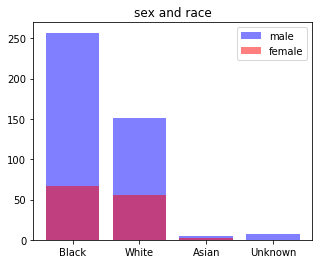

In [103]:
b = ['Black','White','Asian','Unknown']
y_pos = np.arange(len(b))
fig = plt.figure(figsize=(5,4))
#plt.bar(y_pos,women_size,align='center', alpha=0.5,color='r')
plt.bar(y_pos,men_size,align='center', alpha=0.5,color='blue')
plt.bar(y_pos,women_size,align='center', alpha=0.5,color='r')
plt.xticks(y_pos, b)
#plt.ylabel('times')
plt.title('sex and race')
plt.legend(['male','female'])
plt.savefig('race.png')
plt.show()

In [105]:
# weapon
weapon = df['Weapon Code']
print(pd.value_counts(weapon))

None                          354
Personal (Hands/Fist/Feet)     40
Handgun                        21
Knife/Cutting Instrument       15
Blunt Objects                   7
Other                           7
Toy or Fake                     4
Firearm                         3
Motor Vehicle                   2
Sharp Object                    2
Fire/Incendiary Device          1
Handtool                        1
Unknown                         1
Name: Weapon Code, dtype: int64


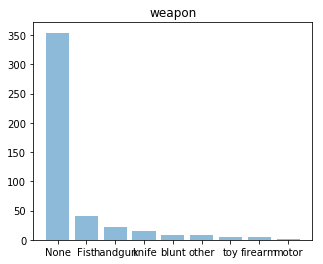

In [124]:
b = ['None','Fist','handgun','knife','blunt','other','toy','firearm','motor']
num = [354, 40, 22, 15, 9, 8, 4, 4,2]
y_pos = np.arange(len(b))
fig = plt.figure(figsize=(5,4))
plt.bar(y_pos,num,align='center', alpha=0.5)
plt.xticks(y_pos, b)
#plt.ylabel('times')
plt.title('weapon')
plt.savefig('weapon.png')
plt.show()

In [113]:
men_wp = np.zeros(2)
for i in range(len(df)):
    if sex[i] == 'Male':
        if weapon[i] == 'None'or pd.isnull(weapon[i]):
            men_wp[0] += 1
        else:
            men_wp[1] += 1
    

In [116]:
women_wp = np.zeros(2)
for i in range(len(df)):
    if sex[i] == 'Female':
        if weapon[i] == 'None'or pd.isnull(weapon[i]):
            women_wp[0] += 1
        else:
            women_wp[1] += 1

In [117]:
print(men_wp)
print(women_wp)

[341.  79.]
[99. 25.]


In [118]:
79/341

0.2316715542521994

In [119]:
25/99

0.25252525252525254

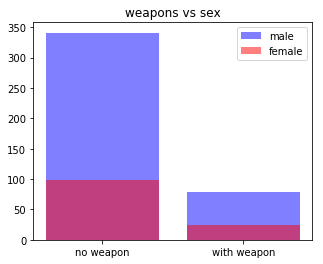

In [125]:
b = ['no weapon','with weapon']
y_pos = np.arange(len(b))
fig = plt.figure(figsize=(5,4))
#plt.bar(y_pos,women_size,align='center', alpha=0.5,color='r')
plt.bar(y_pos,men_wp,align='center', alpha=0.5,color='blue')
plt.bar(y_pos,women_wp,align='center', alpha=0.5,color='r')
plt.xticks(y_pos, b)
#plt.ylabel('times')
plt.title('weapons vs sex')
plt.legend(['male','female'])
plt.savefig('weapon_sex.png')
plt.show()

In [38]:
# age
age = df['Age']


In [39]:
total_age = np.zeros(8)
def compare_a(x):
    for i in range(8):
        if (i+1)*10 <= x < (i+2)*10:
            total_age[i]+=1
    return total_age
            

In [40]:
to_age = age.apply(compare_a)

In [41]:
print(to_age[0])

[ 69. 186. 136.  71.  52.  24.   5.   1.]


In [ ]:
women_age = np.zeros(8)
for i in range(len(df)):
    if sex[i] == 'Female':
        if weapon[i] == 'None'or pd.isnull(weapon[i]):
            women_wp[0] += 1
        else:
            women_wp[1] += 1

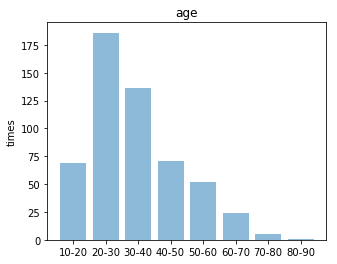

In [128]:
c = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
y_pos = np.arange(len(c))
fig = plt.figure(figsize=(5,4))
plt.bar(y_pos,to_age[0],align='center', alpha=0.5)
plt.xticks(y_pos, c)
plt.ylabel('times')
plt.title('age')
plt.savefig('age.png')
plt.show()

In [43]:
df.reset_index(inplace=True)

In [44]:
# the location gathering
location = df['Location']
print(len(location))

544


In [45]:
loc_null = location.isnull()
xx = []
yy = []
for i in range(len(location)):
    loca = location[i]
    if loc_null[i] == 0:
        loc = loca.split(',')
        #print(i)
        xx.append(loc[0][1:])
        yy.append(loc[1][:-1])
    

In [46]:
print(xx[:5])
print(yy[:5])

['42.052982334727446', '42.0460107307921', '42.05301942527244', '42.025837474313164', '42.04338911487455']
[' -87.69734651386223', ' -87.68378492477495', ' -87.68471901579495', ' -87.68535997696793', ' -87.70375540569039']


In [47]:
print(min(xx),max(xx))
print(min(yy),max(yy))

42.01912576109617 42.067844181835355
 -87.66542545295692  -87.72626851879919


In [48]:
ymin = -87.727
ymax = -87.665
xmax = 42.068
xmin = 42.018

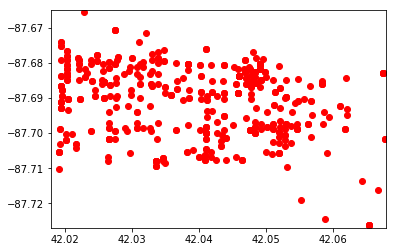

In [49]:
plt.scatter(xx,yy,c = 'r')
plt.xlim((xmin,xmax))
plt.ylim((ymin,ymax))
plt.show()

(562, 662, 4)


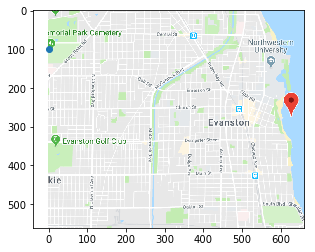

In [51]:
img = plt.imread('map2.png')
implot = plt.imshow(img)
print(img.shape)
plt.scatter([0],[100])
plt.show()

In [52]:
# print(max(float(xx)) - min(float(xx))) #538
# print(max(float(yy)) - min(float(yy))) #581
a = 42.067844181835355-42.01912576109617
b = -87.72626851879919--87.66542545295692

In [53]:
xxx = []
for i in xx:
    val = np.float(i)
    xxx.append(val)

In [54]:
yyy = []
for i in yy:
    val = np.float(i)
    yyy.append(val)

In [55]:
new_x = abs(np.array(xxx) - 42.067844181835355) * (538/a)
new_y = abs(np.array(yyy) + 87.72626851879919) * (581/-b)

(562, 662, 4)


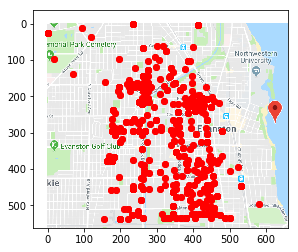

In [60]:
img = plt.imread('map2.png')
implot = plt.imshow(img)
print(img.shape)
plt.scatter(new_y,new_x,c = 'r')
#plt.scatter(new_yc,new_xc,c = 'r')
plt.show()

In [56]:
from mpl_toolkits.basemap import Basemap

In [148]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=42.05, lon_0=-87.65,
            width=1E4, height=1.2E4)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='gray')

c:\users\pumpkin\anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
c:\users\pumpkin\anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [149]:
m.scatter(yyy, xxx, latlon=True,
          cmap='Reds', alpha=0.5)
m.scatter(yc, xc, latlon=True,
          c= 'r', alpha=0.5)

c:\users\pumpkin\anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
c:\users\pumpkin\anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


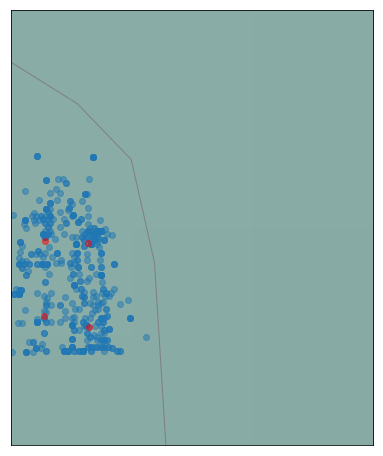

In [150]:
plt.show()

In [108]:
# do the clustring by using mean shift method
from sklearn.cluster import MeanShift,estimate_bandwidth

In [98]:
XY=zip(xxx,yyy)

In [105]:
XY = [list(a) for a in zip(xxx, yyy)]
xy = np.array(XY)

In [107]:
print(xy.shape)

(531, 2)


In [142]:
bandwidth = estimate_bandwidth(xy, quantile=0.2)
print(bandwidth)

0.010701948277584444


In [143]:
clustering = MeanShift(bandwidth=bandwidth).fit(xy)

In [144]:
xyc = clustering.cluster_centers_
print(xyc)

[[ 42.04617225 -87.68485817]
 [ 42.02539485 -87.68442445]
 [ 42.04681984 -87.69921375]
 [ 42.02823862 -87.69941171]
 [ 42.0636739  -87.72275176]]


In [145]:
xc, yc = xyc.T

In [146]:
new_xc = abs(xc - 42.067844181835355) * (538/a)
new_yc = abs(yc + 87.72626851879919) * (581/-b)